<a href="https://colab.research.google.com/github/asepzayn/data-analisis/blob/main/project_intern_bcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Workflow:
1. Research Goal
2. Retrieving Data
3. Data Preparation and Preprocessing
4. Data Visualization
5. Data Modelling
6. Report

# Research Goal

Modelling data dan Implementasi algoritma-algoritma classification untuk memprediksi kepuasan penumpang pesawat terbang berdasarkan data yang kami dapatkan dari https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=train.csv

# Retrieving Data

###Import Library & Csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df_train = pd.read_csv('train.csv')
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

# Data Preparation and Preprocessing

###Cek apakah ada null

In [ ]:
df_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

###Mengisi null pada Arrival Delay in Minutes dengan rata rata

In [ ]:
df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean(), inplace=True)
df_train.isna().any()

Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

###Cek Duplikasi

In [ ]:
df_train.duplicated().value_counts()
#Tidak ada duplikasi data

False    103904
dtype: int64

### Deskripsi data

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


### Korelasi data

In [ ]:
df_train.corr()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.002991,0.004786,0.002794,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045
id,0.002991,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037196
Age,0.004786,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012127
Flight Distance,0.002794,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002423
Inflight wifi service,-0.002490,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019067
Departure/Arrival time convenient,0.000739,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000863
Ease of Online booking,0.001913,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007972
Gate location,0.005073,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005136
Food and drink,-0.002162,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032472
Online boarding,0.001002,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021915


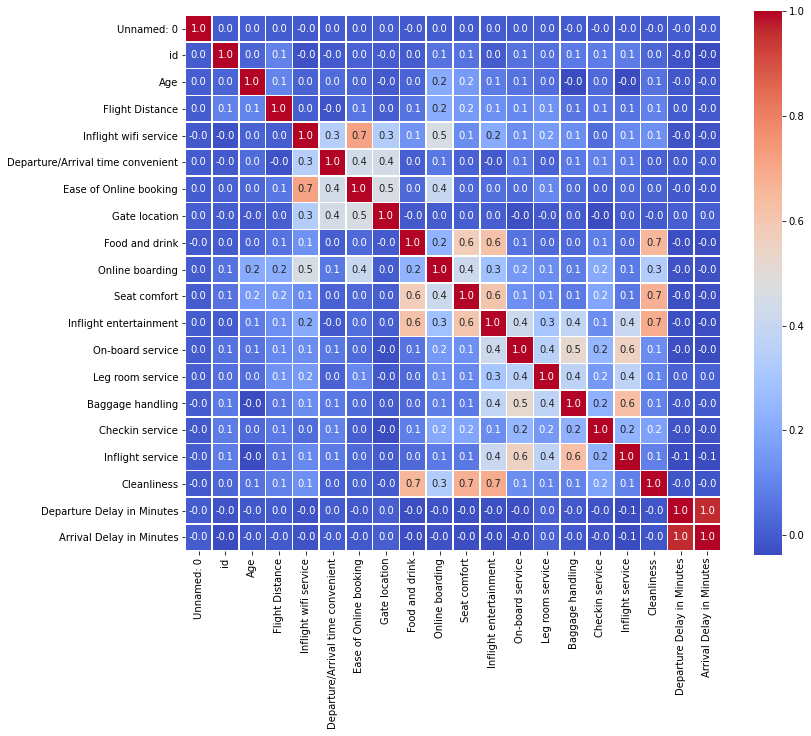

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True, linewidth=0.6, fmt='.1f', square=True, robust=True)

### Drop data yang tidak diperlukan (Kolom unnamed & id)

In [ ]:
df_train.drop(['Unnamed: 0','id'],axis=1, inplace=True)
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
#mengganti spasi dengan _
df_train.columns = [each.replace(" ", "_") for each in df_train.columns]
df_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Merubah data categorical menjadi numerical

In [ ]:
#Binary encoding data train
df_train['Gender'] = df_train['Gender'].map({'Female': 1, 'Male': 0})
df_train['Type_of_Travel'] = df_train['Type_of_Travel'].map({'Business travel': 1, 'Personal Travel': 0})
df_train['Customer_Type'] = df_train['Customer_Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
df_train['Class'] = df_train['Class'].map({'Business': 2, 'Eco Plus': 1, 'Eco': 0})
df_train['satisfaction'] = df_train['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

### Handle Outliers

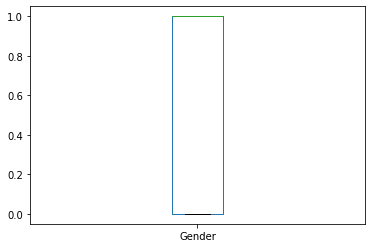

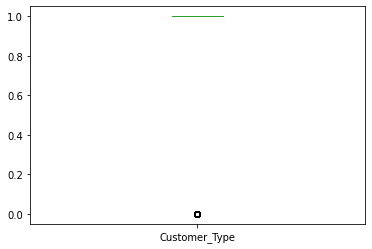

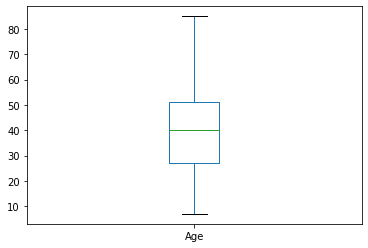

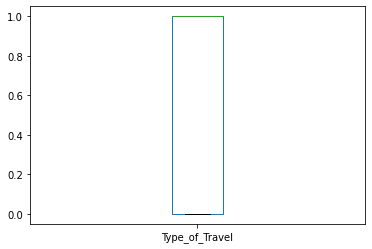

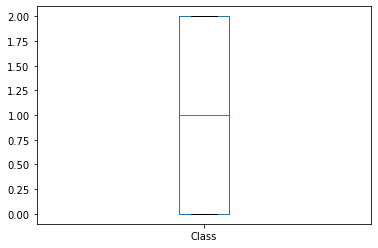

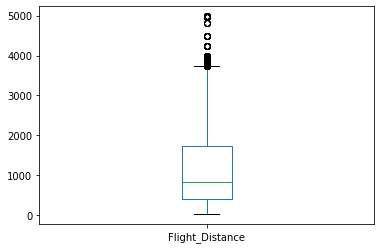

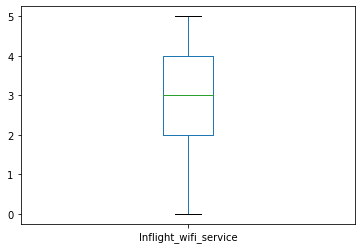

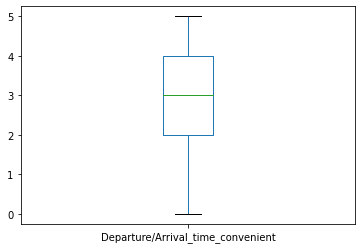

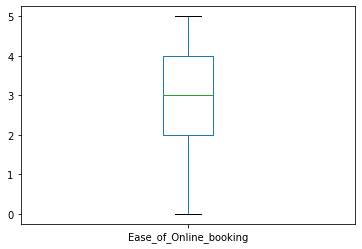

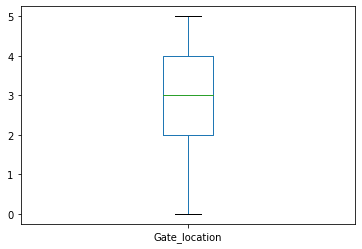

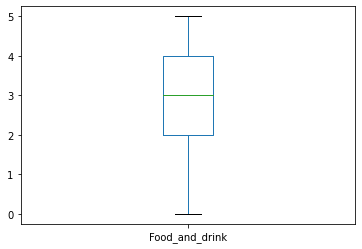

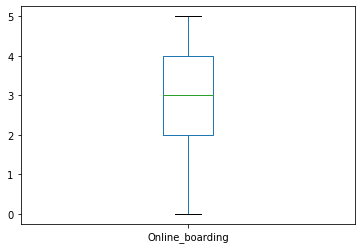

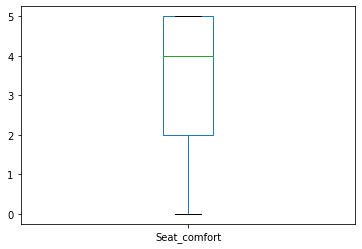

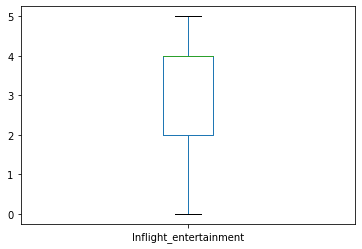

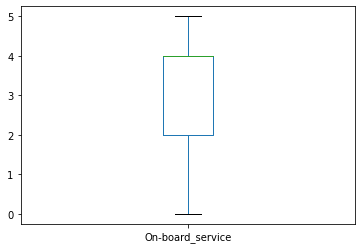

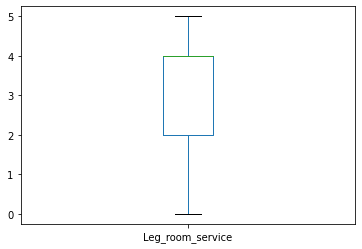

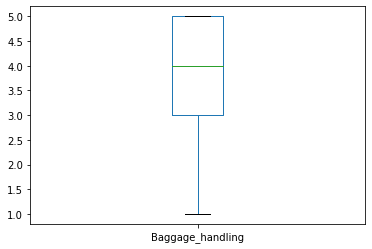

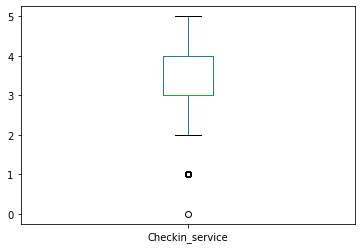

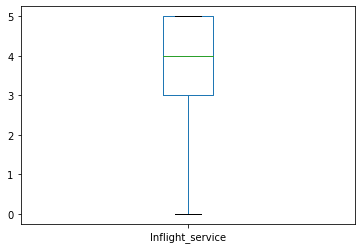

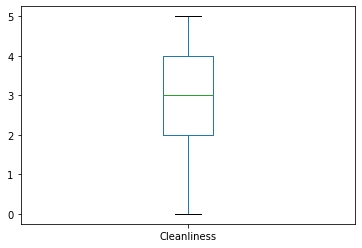

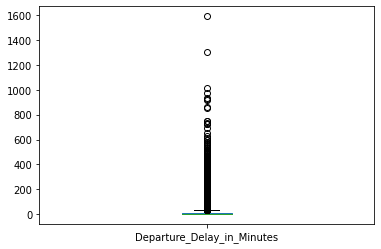

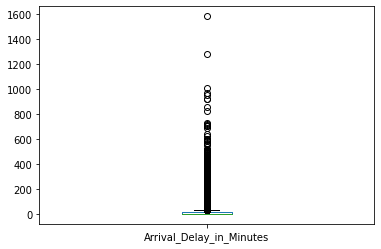

In [ ]:
for x in df_train.columns:
    if(x == "satisfaction"): 
        continue
    else:
        df_train[x].plot.box()
        plt.show()

In [ ]:
def fill_outliers_with_mean(data, x):
    Q1 = data[x].describe()['25%']
    Q3 = data[x].describe()['75%']
    IQR = Q3-Q1
    for i in data.index:
        if((data.loc[i][x] < Q1-1.5*IQR) | (data.loc[i][x] > Q3+1.5*IQR)):
            data[x].fillna(data[x].mean(), inplace=True)


In [ ]:
fill_outliers_with_mean(df_train, 'Flight_Distance')
fill_outliers_with_mean(df_train, 'Checkin_service')
fill_outliers_with_mean(df_train, 'Departure_Delay_in_Minutes')
fill_outliers_with_mean(df_train, 'Arrival_Delay_in_Minutes')

### Mengulangi proses untuk data test

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
df_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean(), inplace=True)

In [ ]:
df_test.duplicated().value_counts()
#Tidak ada duplikasi data

False    25976
dtype: int64

In [ ]:
df_test.drop(['Unnamed: 0','id'],axis=1, inplace=True)

In [ ]:
df_test.columns = [each.replace(" ", "_") for each in df_test.columns]

In [ ]:
#Binary encoding data test
df_test['Gender'] = df_test['Gender'].map({'Female': 1, 'Male': 0})
df_test['Type_of_Travel'] = df_test['Type_of_Travel'].map({'Business travel': 1, 'Personal Travel': 0})
df_test['Customer_Type'] = df_test['Customer_Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
df_test['Class'] = df_test['Class'].map({'Business': 2, 'Eco Plus': 1, 'Eco': 0})
df_test['satisfaction'] = df_test['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [ ]:
fill_outliers_with_mean(df_test, 'Flight_Distance')
fill_outliers_with_mean(df_test, 'Checkin_service')
fill_outliers_with_mean(df_test, 'Departure_Delay_in_Minutes')
fill_outliers_with_mean(df_test, 'Arrival_Delay_in_Minutes')

### Melihat value counts yang nantinya untuk menarik kesimpulan hendak menggunakan f1_score atau accuracy

In [ ]:
df_train['satisfaction'].value_counts() #Data imbalance menggunakan f1 score

0    58879
1    45025
Name: satisfaction, dtype: int64

# Data Visualization

0    58879
1    45025
Name: satisfaction, dtype: int64

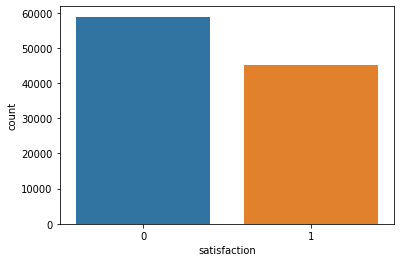

In [ ]:
sns.countplot(data=df_train, x='satisfaction')
df_train['satisfaction'].value_counts()

# satisfied : 1
# neutral or dissatisfied : 0

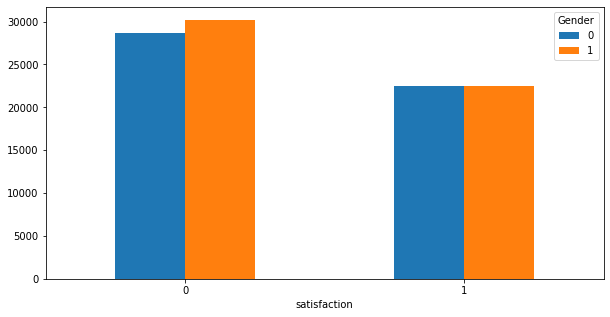

In [ ]:
class_df = df_train.groupby(['satisfaction','Gender'])['satisfaction'].count().unstack('Gender')
class_df.plot(kind='bar', figsize=(10,5), rot=0)

# Female : 1 
# Male : 0

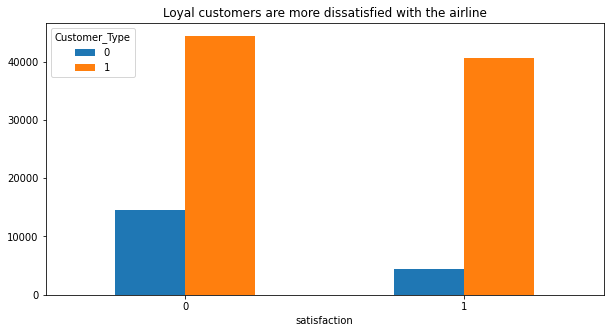

In [ ]:
customer_df = df_train.groupby(['satisfaction','Customer_Type'])['satisfaction'].count().unstack('Customer_Type')
customer_df.plot(kind='bar', figsize=(10,5), rot=0, title='Loyal customers are more dissatisfied with the airline')

# Loyal Customer : 1
# disloyal Customer: 0

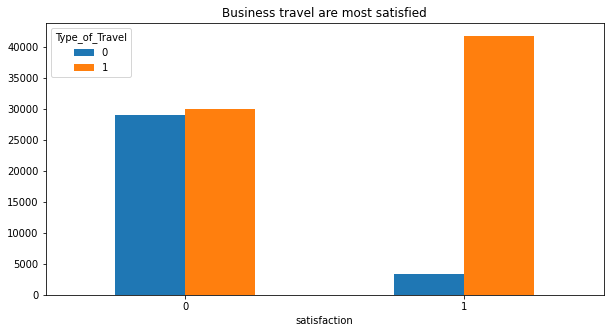

In [ ]:
class_df = df_train.groupby(['satisfaction','Type_of_Travel'])['satisfaction'].count().unstack('Type_of_Travel')
class_df.plot(kind='bar', figsize=(10,5), rot=0, title='Business travel are most satisfied')

# Business travel : 1
# Personal Travel : 0

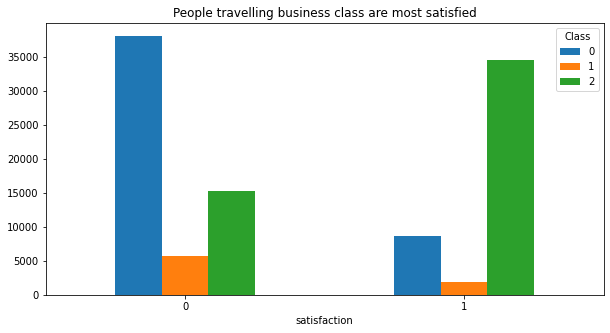

In [ ]:
class_df = df_train.groupby(['satisfaction','Class'])['satisfaction'].count().unstack('Class')
class_df.plot(kind='bar', figsize=(10,5), rot=0, title='People travelling business class are most satisfied')

# Business : 2
# Eco Plus : 1
# Eco : 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

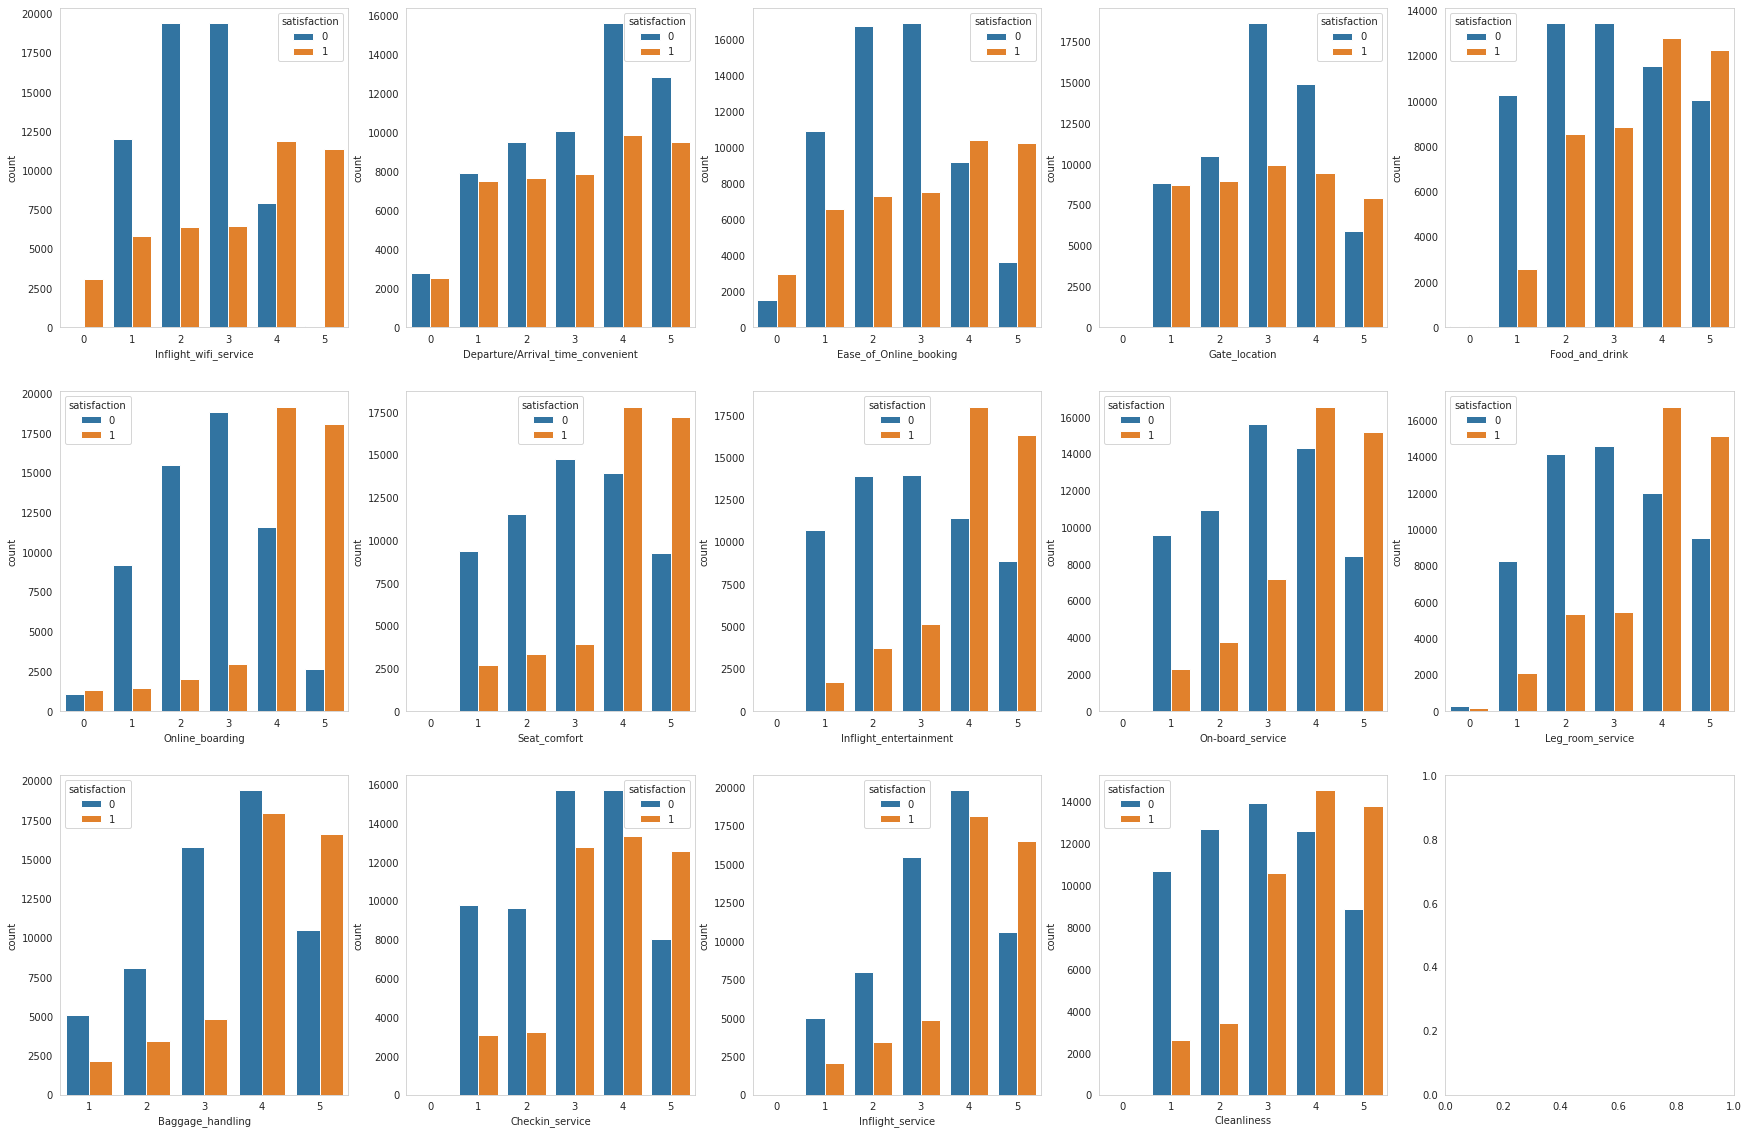

In [ ]:
columns = ["Inflight_wifi_service",
           "Departure/Arrival_time_convenient",
           "Ease_of_Online_booking",
           "Gate_location",
           "Food_and_drink",
           "Online_boarding",
           "Seat_comfort",
           "Inflight_entertainment",
           "On-board_service",
           "Leg_room_service",
           "Baggage_handling",
           "Checkin_service",
           "Inflight_service",
           "Cleanliness"]

fig, ax = plt.subplots(3, 5, figsize=(30,20))
for var, subplot in zip(columns, ax.flatten()):
  sns.countplot(df_train[var], hue=df_train['satisfaction'], ax=subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(0)

# Data Modelling and Report 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
# preparing train_test_set
X_train = df_train.drop('satisfaction', axis = 1)
y_train = df_train['satisfaction']

X_test = df_test.drop('satisfaction', axis = 1)
y_test = df_test['satisfaction']


In [ ]:
#Standardizing data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# making a dictionary in which we include two models with some parameters pre-set.
model_params = {
    'random_forest' :{
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1, 5, 10, 100]
        }
    },
    
    'logistics_regression' : {
        'model' : LogisticRegression(max_iter = 7600, solver = 'lbfgs', multi_class = 'auto'),
        'params' : {
            'C' : [0.1, 1, 10, 100],
            'solver' : ['lbfgs', 'liblinear']
        }
    }
}

In [ ]:
# implement GridSearchCV for two models using a loop and a previously created dictionary
# in the created variable scores, we save best_score and best_params for each model
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
    print(mp['model'])
    print('\nfitting...')
    clf.fit(X_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    print('\nscore is appended\n')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

fitting...

score is appended

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

fitting...

score is appended



In [ ]:
# Membuat dataframe untuk best_score & best_params
sc = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
sc

,model,best_score,best_params
0,random_forest,0.961792,{'n_estimators': 100}
1,logistics_regression,0.874798,"{'C': 100, 'solver': 'liblinear'}"


##Random Forest

In [ ]:
# Implementasi Random Forest model pake best_params
clf_rfc = RandomForestClassifier(n_estimators =  100)  #--->>> masi pake library
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

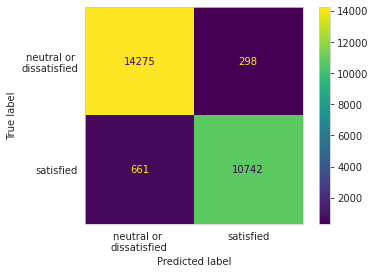

In [ ]:
# confusion matrix 
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(clf_rfc,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels=['neutral or \ndissatisfied', 'satisfied'])

In [ ]:
# Create a classification report for the RFC model 
predictions_rfc = clf_rfc.predict(X_test)
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## Logistic  Regression

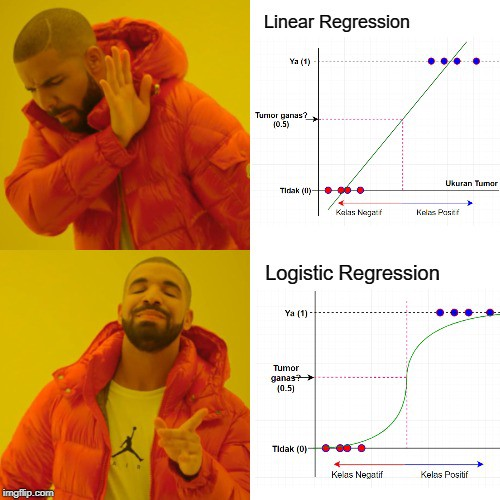

Langkah langkah membuat Logistic Function
1. Penentuan Koefisien Logistic Function : Maximum Likelihood + R-Squared (R²)
2. Penentuan Koefisien Logistic Function : Stochastic Gradient Descent

##### LR Manual

In [ ]:
class LogisticRegressionM:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [ ]:
regressor = LogisticRegressionM(learning_rate=0.5, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

print(classification_report(y_test, predictions))


[[13011  1562]
 [ 1892  9511]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14573
           1       0.86      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.86     25976
weighted avg       0.87      0.87      0.87     25976



##### LR Pakai Library

In [ ]:
 from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter = 2000)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Create a classification report for the LR model 
predictions_lr = clf_lr.predict(X_test) 
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_lr)
print(cm)

[[13137  1436]
 [ 1907  9496]]


## Naive Bayes

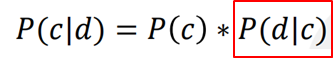

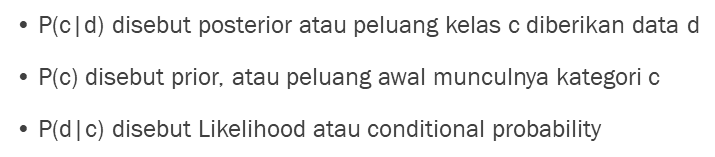

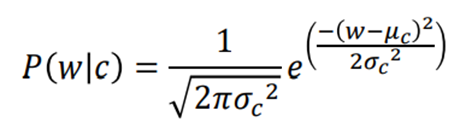

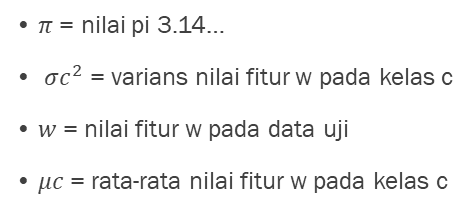

##### NB Manual

In [ ]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

In [ ]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14573
           1       0.86      0.82      0.84     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[13036  1537]
 [ 2049  9354]]


##### NB Pakai Library

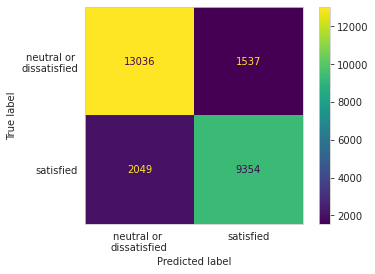

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Fitting Naive Bayes to the Training set
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

# Making the Confusion Matrix
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(clf_NB,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels=['neutral or \ndissatisfied', 'satisfied'])



In [ ]:
# Create a classification report for the NB model 
predictions_nb = clf_NB.predict(X_test) 
print(classification_report(y_test,predictions_nb))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14573
           1       0.86      0.82      0.84     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976



## KNN

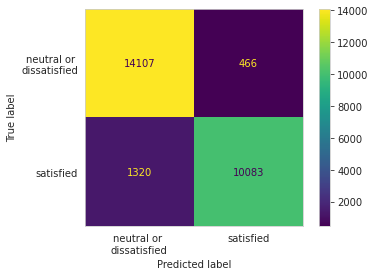

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)

# Making the Confusion Matrix
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(knn,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels=['neutral or \ndissatisfied', 'satisfied'])

In [ ]:
# Create a classification report for the KNN model 
predictions_knn = knn.predict(X_test) 
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14573
           1       0.96      0.88      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.94      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

